In [83]:
from utils import *
from tqdm.auto import tqdm
from SALib.analyze import pawn, morris, delta
from scipy.signal import correlate
import numpy as np
import pickle
import time
import os
import scipy.interpolate as spi
from scipy.stats import binned_statistic_2d

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.patches as patches
from matplotlib.colors import Normalize
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": False, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
plt.rc("text", usetex=False)
plt.rc("font", family="serif")

# CPT

In [84]:
directory = "cpt"
with open(directory + "_dominant_frequencies_amplitudes.pickle", "rb") as f:
    freqs = pickle.load(f)

problem = {
    'num_vars': 7,
    'names': [r"$\alpha$", r"$P_{H_-}$", r"$P_{H_+}$", r"$\gamma$", r"$A$", r"$\omega$", r"$\eta$"],
    'bounds': [[0,1], [0,1], [0,1], [0.4,0.8], [0,1], [1,4], [0.5,1]]
}

X = []
Y = []
for idx,f in tqdm(enumerate(os.listdir(directory))):
    with open(os.path.join(directory, f), "rb") as f:
        res = pickle.load(f)["params"]
    F = freqs[idx]["frequencies"]
    F[np.isnan(F)] = 0
    X.append((res["alpha"], res["P_H_decrease"], res["P_H_increase"], res["gamma"], res["w_delta_scale"], res["omega"], res["eta"]))
    Y.append(np.mean(F))
    
X = np.array(X)
Y = np.array(Y)

0it [00:00, ?it/s]

In [85]:
# --- PAWN Analysis ---
pawn_indices = pawn.analyze(problem, X, Y, S=10)

# --- Delta Moment-Independent Analysis ---
delta_indices = delta.analyze(problem, X, Y, num_resamples=1000)

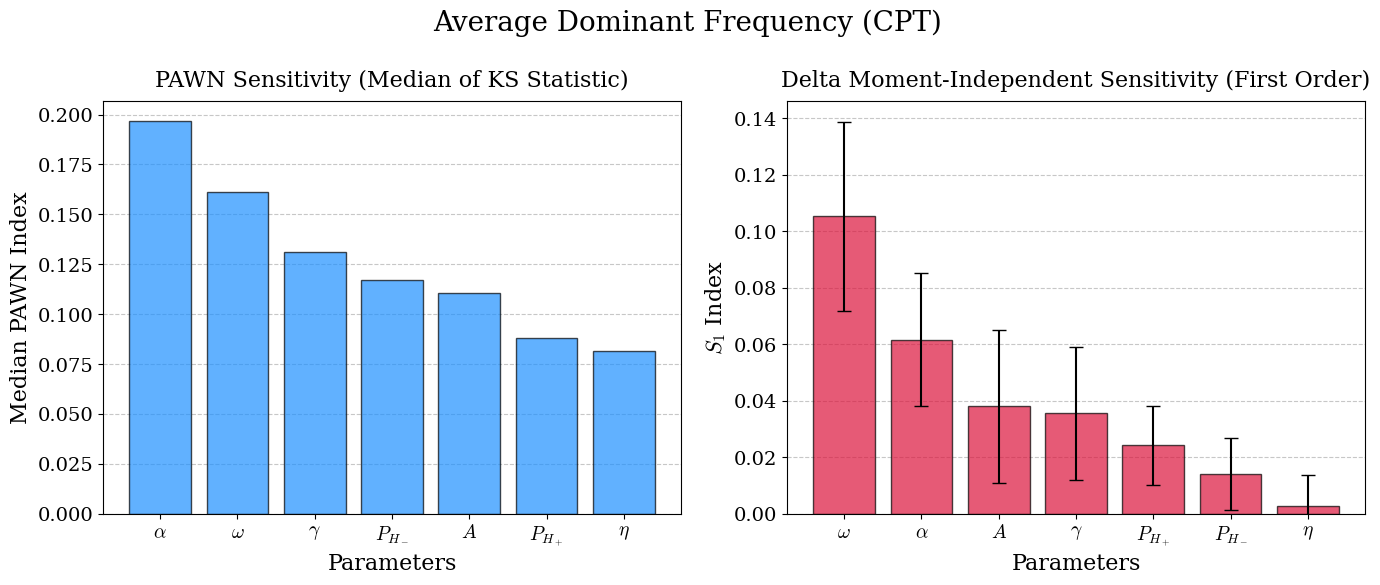

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Left Subplot: PAWN Bar Chart ---
pawn_median_values = pawn_indices['median']
pawn_names_from_dict = pawn_indices['names']
pawn_results = sorted(zip(pawn_median_values, pawn_names_from_dict), reverse=True)
pawn_values_sorted = [item[0] for item in pawn_results]
pawn_names_sorted = [item[1] for item in pawn_results]

ax1.bar(pawn_names_sorted, pawn_values_sorted, color='dodgerblue', edgecolor='black', alpha=0.7)
ax1.set_title('PAWN Sensitivity (Median of KS Statistic)', fontsize=16, pad=10)
ax1.set_ylabel('Median PAWN Index')
ax1.set_xlabel('Parameters')
ax1.set_ylim(0, )
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- Right Subplot: Delta First-Order (S1) Bar Chart ---
s1_values = delta_indices['S1']
s1_confs = delta_indices['S1_conf']
s1_names_from_dict = delta_indices['names']
s1_results = sorted(zip(s1_values, s1_confs, s1_names_from_dict), reverse=True)
s1_values_sorted = [item[0] for item in s1_results]
s1_confs_sorted = [item[1] for item in s1_results]
s1_names_sorted = [item[2] for item in s1_results]

# Plot the bars with error bars representing the confidence intervals
ax2.bar(s1_names_sorted, s1_values_sorted, yerr=s1_confs_sorted, capsize=5, color='crimson', edgecolor='black', alpha=0.7)
ax2.set_title('Delta Moment-Independent Sensitivity (First Order)', fontsize=16, pad=10)
ax2.set_ylabel(r'$S_1$ Index')
ax2.set_xlabel('Parameters')
ax2.set_ylim(0, )
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Average Dominant Frequency (CPT)", fontsize=20)
plt.tight_layout()
plt.show()

# No-CPT

In [88]:
directory = "nocpt"
with open(directory + "_dominant_frequencies_amplitudes.pickle", "rb") as f:
    freqs = pickle.load(f)

problem_nocpt = {
    'num_vars': 4,
    'names': [r"$\alpha$", r"$P_{H_-}$", r"$P_{H_+}$", r"$A$"],
    'bounds': [[0,1], [0,1], [0,1], [0,1]]
}

X = []
Y = []

for idx,f in tqdm(enumerate(os.listdir(directory))):
    with open(os.path.join(directory, f), "rb") as f:
        res = pickle.load(f)["params"]
    F = freqs[idx]["frequencies"]
    F[np.isnan(F)] = 0
    X.append((res["alpha"], res["P_H_decrease"], res["P_H_increase"], res["w_delta_scale"]))
    Y.append(np.mean(F))
    
X = np.array(X)
Y = np.array(Y)

0it [00:00, ?it/s]

In [89]:
# --- PAWN Analysis ---
pawn_indices = pawn.analyze(problem_nocpt, X, Y, S=10)

# --- Delta Moment-Independent Analysis ---
delta_indices = delta.analyze(problem_nocpt, X, Y, num_resamples=1000)

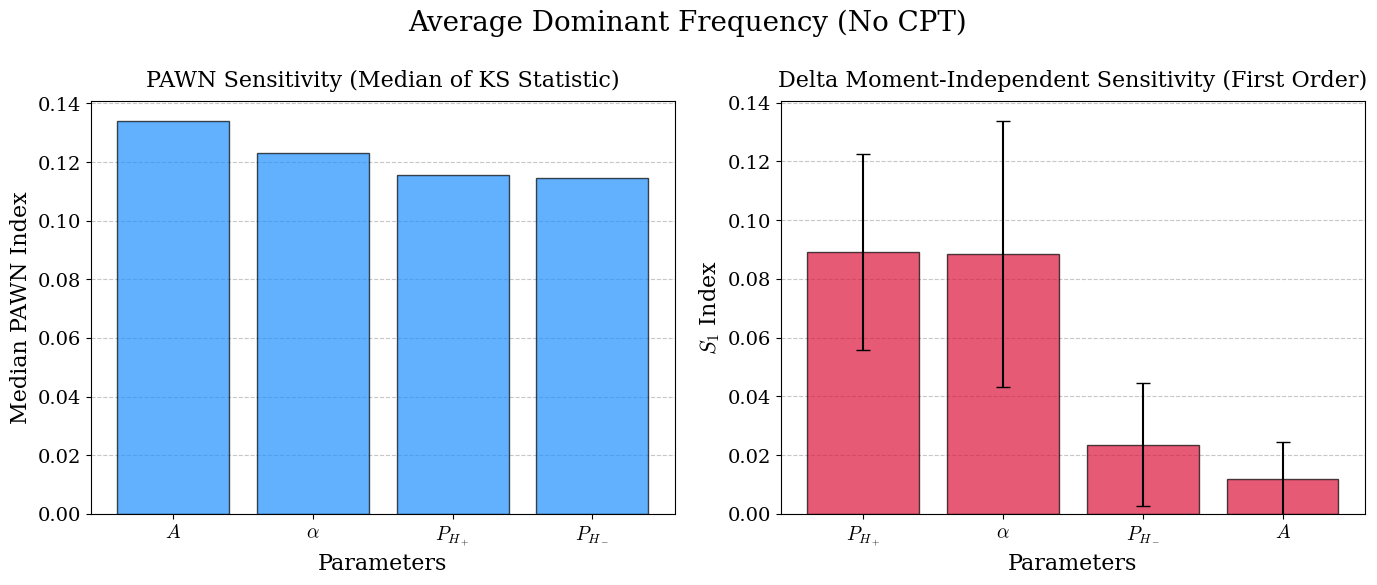

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Left Subplot: PAWN Bar Chart ---
pawn_median_values = pawn_indices['median']
pawn_names_from_dict = pawn_indices['names']
pawn_results = sorted(zip(pawn_median_values, pawn_names_from_dict), reverse=True)
pawn_values_sorted = [item[0] for item in pawn_results]
pawn_names_sorted = [item[1] for item in pawn_results]

ax1.bar(pawn_names_sorted, pawn_values_sorted, color='dodgerblue', edgecolor='black', alpha=0.7)
ax1.set_title('PAWN Sensitivity (Median of KS Statistic)', fontsize=16, pad=10)
ax1.set_ylabel('Median PAWN Index')
ax1.set_xlabel('Parameters')
ax1.set_ylim(0, )
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- Right Subplot: Delta First-Order (S1) Bar Chart ---
s1_values = delta_indices['S1']
s1_confs = delta_indices['S1_conf']
s1_names_from_dict = delta_indices['names']
s1_results = sorted(zip(s1_values, s1_confs, s1_names_from_dict), reverse=True)
s1_values_sorted = [item[0] for item in s1_results]
s1_confs_sorted = [item[1] for item in s1_results]
s1_names_sorted = [item[2] for item in s1_results]

# Plot the bars with error bars representing the confidence intervals
ax2.bar(s1_names_sorted, s1_values_sorted, yerr=s1_confs_sorted, capsize=5, color='crimson', edgecolor='black', alpha=0.7)
ax2.set_title('Delta Moment-Independent Sensitivity (First Order)', fontsize=16, pad=10)
ax2.set_ylabel(r'$S_1$ Index')
ax2.set_xlabel('Parameters')
ax2.set_ylim(0, )
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Average Dominant Frequency (No CPT)", fontsize=20)
plt.tight_layout()
plt.show()